In [1]:
import sympy as sp

In [2]:
# Define the polar and Cartesian coordinates
r, theta = sp.symbols('r theta')
x, y = sp.symbols('x y')

# Define the conversion equations from polar to Cartesian coordinates
x = r * sp.cos(theta)
y = r * sp.sin(theta)

# Define the vector-valued function
f = sp.Matrix([x, y])

# Define the variables for the Jacobian matrix
vars = [r, theta]

# Calculate the Jacobian matrix
J = f.jacobian(vars)

# Print the Jacobian matrix
print("The Jacobian matrix for the conversion from polar to Cartesian coordinates is:")
sp.pprint(J)

The Jacobian matrix for the conversion from polar to Cartesian coordinates is:
⎡cos(θ)  -r⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  r⋅cos(θ) ⎦


In [3]:
J.subs({r: 1, theta: sp.pi / 2})

Matrix([
[0, -1],
[1,  0]])

# Homework 3
## Part 1
Implement the non-linear transformation using the values of Chapter 2 Slide 25

1. Fill in values
(not sure which ones?)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# stochastic variable POLAR with
# x_POLAR representing the expected values (2-d)
# S_Polar representing the variances of d and alpha (2x2 matrix)

### Transform polar x_POLAR $\rightarrow$ x_CARTESIAN

In [5]:
# 2-dimensional vector x_POLAR for expected values
x_POLAR = np.array([50, 20])  # replace with your values

# transformation F for vector of expected values
r = np.sqrt(x_POLAR[0]**2 + x_POLAR[1]**2)
theta = np.arctan2(x_POLAR[1], x_POLAR[0])
x_CARTESIAN = np.array([r*np.cos(theta), r*np.sin(theta)])

print("x_POLAR", x_POLAR)
print("r:\n", r)
print("theta:\n", theta)
print("x_CARTESIAN:\n", x_CARTESIAN)

x_POLAR [50 20]
r:
 53.85164807134504
theta:
 0.3805063771123649
x_CARTESIAN:
 [50. 20.]


### Transformation S_POLAR $\rightarrow$ S_CARTESIAN

In [6]:
# 2 x 2 dimensional matrix S_POLAR for covariances
S_POLAR = np.array([[5000, 1000], [300, 300]])  # replace with your values

# Jacobian of F
nablaF = np.array([[np.cos(theta), -r*np.sin(theta)],
                   [np.sin(theta), r*np.cos(theta)]])
# transformation for covariance matrix
S_CARTESIAN = nablaF @ S_POLAR @ nablaF.T

print("S_POLAR\n", S_POLAR)
print("Jacobian of F:\n", nablaF)
print("S_CARTESIAN:\n", S_CARTESIAN)

S_POLAR
 [[5000 1000]
 [ 300  300]]
Jacobian of F:
 [[  0.92847669 -20.        ]
 [  0.37139068  50.        ]]
S_CARTESIAN:
 [[ 100169.95086457 -254080.37158283]
 [-291776.52523277  774830.04913543]]


### Draw cartesiam coordinates

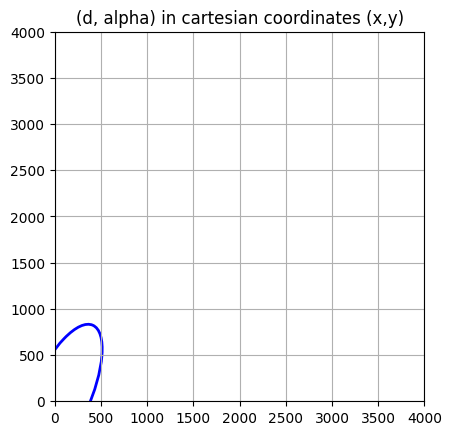

In [7]:
# we now draw the cartesian coordinates
AXIS = [0, 4000, 0, 4000]
fig, ax = plt.subplots()
ax.set_title("(d, alpha) in cartesian coordinates (x,y)")
ax.set_xlim(AXIS[0], AXIS[1])
ax.set_ylim(AXIS[2], AXIS[3])
ax.set_aspect("equal")
ax.grid(True)
cov_ellipse = Ellipse(xy=x_CARTESIAN, width=2*np.sqrt(S_CARTESIAN[0,0]), height=2*np.sqrt(S_CARTESIAN[1,1]), angle=np.rad2deg(np.arccos(S_CARTESIAN[0,1]/np.sqrt(S_CARTESIAN[0,0]*S_CARTESIAN[1,1]))), edgecolor='b', lw=2, facecolor='none')
ax.add_artist(cov_ellipse)
plt.show()

## Part 2

In [8]:
import sympy

d, alpha = sympy.symbols('d alpha')
J = sympy.Matrix([d * sympy.cos(alpha), d * sympy.sin(alpha)]).jacobian([d, alpha])
J

Matrix([
[cos(alpha), -d*sin(alpha)],
[sin(alpha),  d*cos(alpha)]])

What we did
- loading the symbolic package
- declaring "d" as symbolic variable
- declaring "alpha" as symbolic variable
- calculating the Jacobian with the first variable d and the second variable alpha
- as result, you get a 2 x 2 matrix, exactly as in Chapter 2 / slides 29, 30